<a href="https://colab.research.google.com/github/e-abtahi/Neural_Networks_Portfolio/blob/main/Application_Case_Flight_Price/Flight_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Price Prediction Case Study

## Context and Problem
 - The objective of this project is to predict the price of a flight with a set of relevant flight details provided
 - The flight details have information related to flight timings, source and destination details, route details, stops in between, etc.
 - The dataset consists of about one year of information about various flights and their respective prices.

## Data Information

The data at hand has eleven features about the spending on advertising and the target variable is the net sales. Attributes are:

- Airline - Company that provides air transport services for traveling passengers. (Independent Variable)
- Source  - From where the flight is takes off.(Independent Variable)
- Destination - To where the flight is going.(Independent Variable)
- Route   - What is the route of each flight.(Independent Variable)
- Dep Time - Departure Time of the flight.(Independent Variable)
- Arrival Time - Arrival Time of the flight.(Independent Variable)
- Duration - Total duration of the flight.(Independent Variable)
- Total Stops - Number of stops between source and destination.(Independent Variable)
- Additional info - Additional information about the flight is given.(Independent Variable)
- Price - Price of each flight.(Dependent Variable)

**Mounting the Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the required libraries**

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

#### **Reading the Dataset**

In [3]:
#Since data is in form of excel file we have to use pandas pd.read_excel to load the data.
data = pd.read_excel('/content/drive/MyDrive/Data.xlsx')

#### Print the first five rows of the data

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [6]:
#Checking the shape of the data
data.shape

(10682, 11)

In [7]:
#finding the null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# Checking where the null value present
data[data['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9038,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


* Those 2 values belong to a single row so we can drop that row

In [9]:
#drop the null values
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
#Checking the dtypes of the variables in the data
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* The dtypes of 'Date_of_Journey','Dep_Time',and 'Arrival_Time' is in object, so firstly converting it into datetime dtype

In [12]:
# Creating a function to convert those columns into datetime dtype
def To_Datetime(data,column):
    data[column] = pd.to_datetime(data[column])
    return data[column]

In [13]:
# convert the columns we want into datetime
To_Datetime(data,'Date_of_Journey')
To_Datetime(data,'Dep_Time')
To_Datetime(data,'Arrival_Time')

0       2023-03-22 01:10:00
1       2023-12-24 13:15:00
2       2023-06-10 04:25:00
3       2023-12-24 23:30:00
4       2023-12-24 21:35:00
                ...        
10677   2023-12-24 22:25:00
10678   2023-12-24 23:20:00
10679   2023-12-24 11:20:00
10680   2023-12-24 14:10:00
10681   2023-12-24 19:15:00
Name: Arrival_Time, Length: 10681, dtype: datetime64[ns]

* We can extract day and month from Date_of_journey and store it in two other columns.

In [14]:
# creating new columns
data['Day_of_Journey'] = data['Date_of_Journey'].dt.day
data['Month_of_Journey'] = data['Date_of_Journey'].dt.month

* Now using Dep_Time and Arrival_Time we can extract hour and minute from both the variables

In [15]:
# Extracting hour and minute values from Dep_time variable
data['Dep_hour'] = data['Dep_Time'].dt.hour
data['Dep_minute'] = data['Dep_Time'].dt.minute

# Extracting hour value from Dep_time variable
data['Arrival_hour'] = data['Arrival_Time'].dt.hour
data['Arrival_minute'] = data['Arrival_Time'].dt.minute

* After extacting required data from Date_of_Journey, Dep_Time, and Arrival_Time we can drop these variables

In [16]:
data.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

* Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [17]:
duration=list(data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
# Adding duration_hours and duration_mins list to train_data dataframe

data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [19]:
#Dropping Duration variable as we have extracted both hours and mins from it
data.drop(["Duration"], axis = 1, inplace = True)

In [20]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [21]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_Journey       int64
Month_of_Journey     int64
Dep_hour             int64
Dep_minute           int64
Arrival_hour         int64
Arrival_minute       int64
Duration_hours       int64
Duration_mins        int64
dtype: object

### Exploratory Data Analysis

#### Univariate Analysis

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### `Airline`

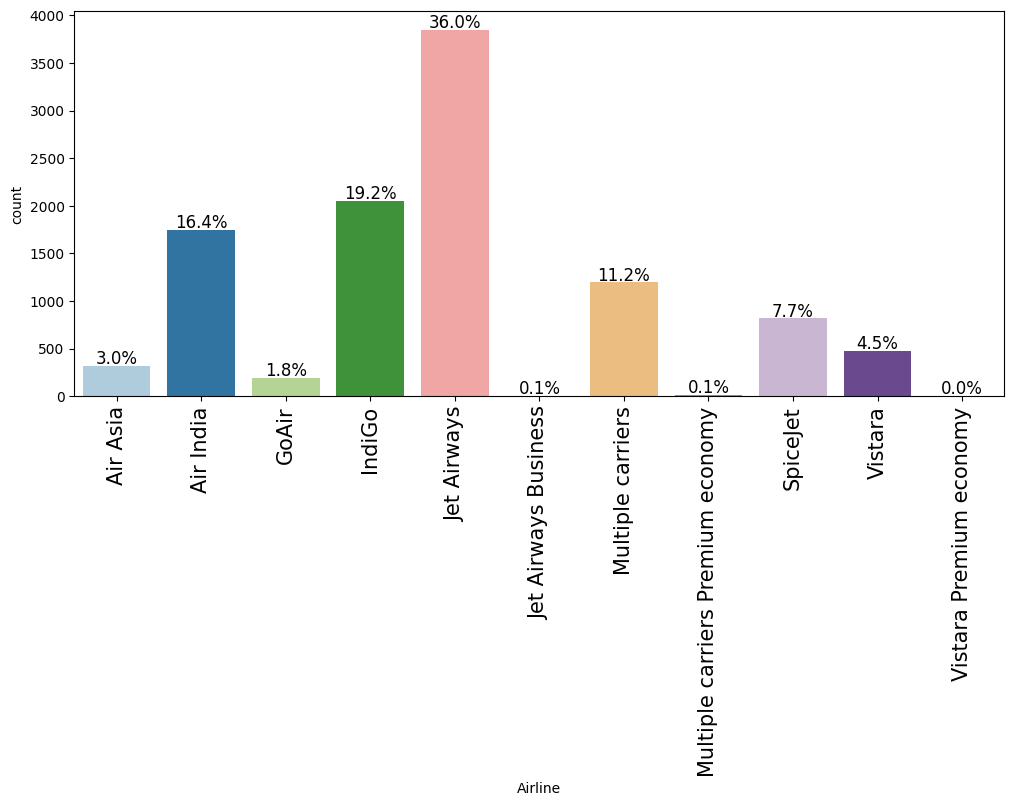

In [23]:
labeled_barplot(data, "Airline", perc=True)

* From the above bar plot we can see most of them have opted Jet Airways as their Airline for transportation

### `Total Stops`

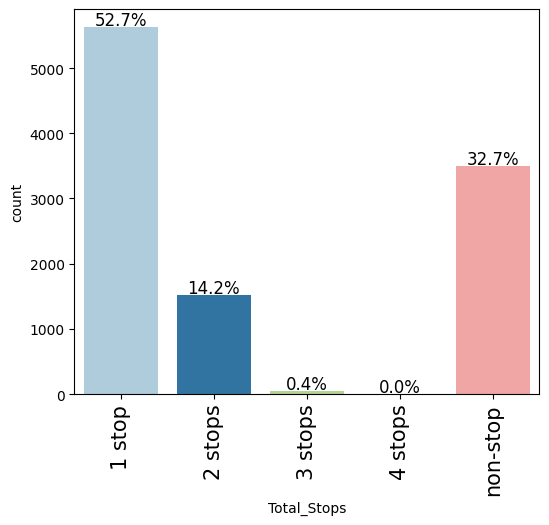

In [24]:
labeled_barplot(data, "Total_Stops", perc=True)

* Most of the airlines runs with maximum of single stop during the journey  

### `Source`

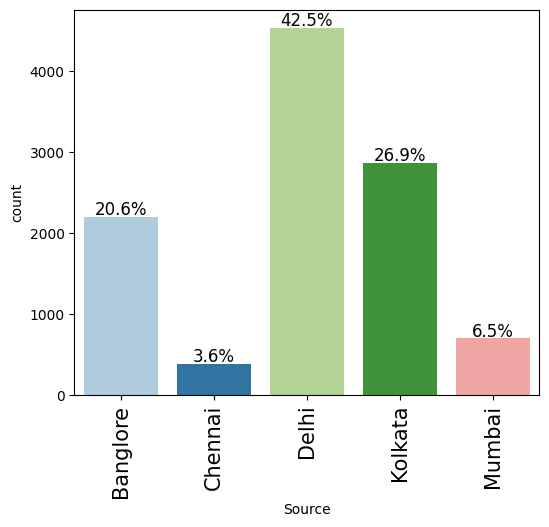

In [25]:
labeled_barplot(data, "Source", perc=True)

* Most of flights are departing from the capital city of India(Delhi)

### `Destination`

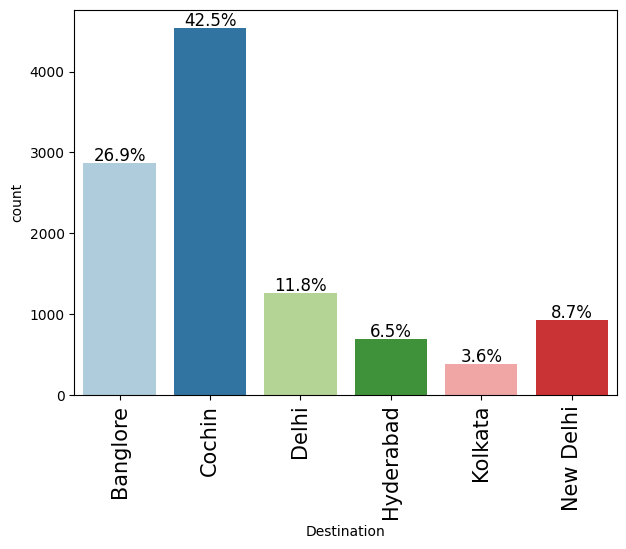

In [26]:
labeled_barplot(data, "Destination", perc=True)

In [27]:
#New Delhi and Delhi can be the same so we will merge them
data['Destination'].replace('New Delhi','Delhi',inplace=True)

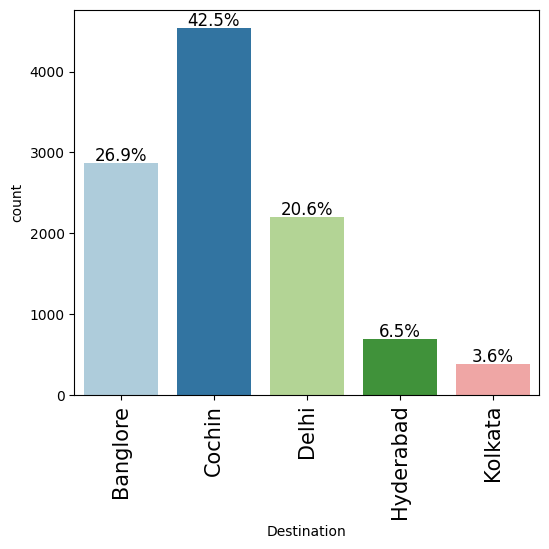

In [28]:
labeled_barplot(data, "Destination", perc=True)

* From the above plot we can observe most of the filghts are going to Cochin

### `Additional_Info`

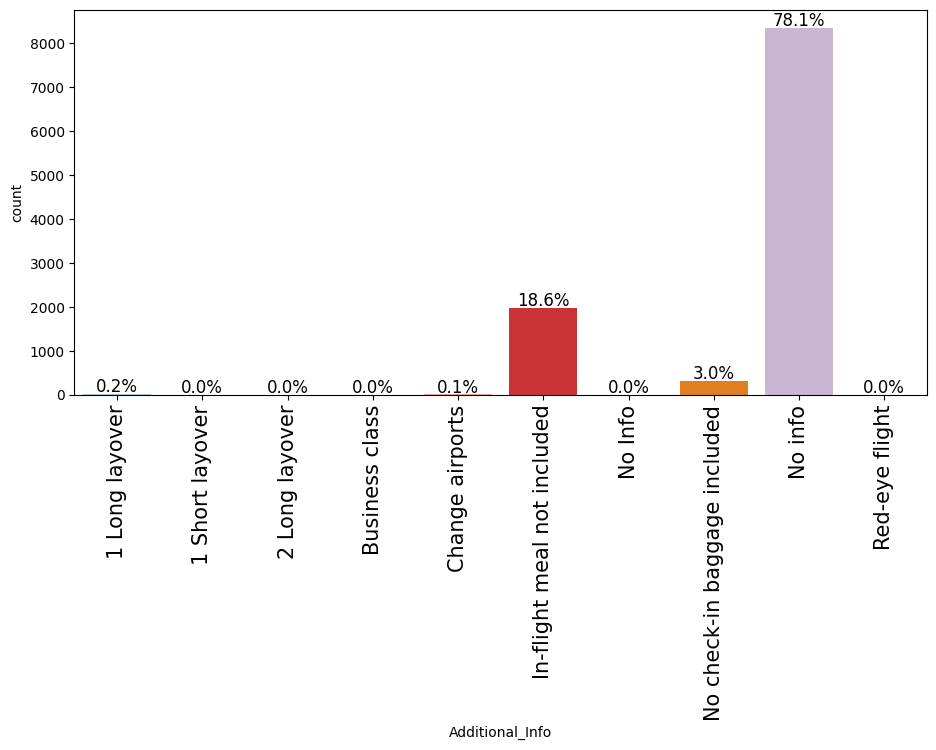

In [29]:
labeled_barplot(data, "Additional_Info", perc=True)

* As most of the Additional_Info (80%) variable contains No_info so we can drop this from the data

In [30]:
data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → RPR → HYD → BLR       1
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → BBI → HYD             1
Name: Route, Length: 127, dtype: int64

* Route and Total_Stops are related to each other so we can drop Route variable.
* Since there is not much information from the Additional_info variable, we will drop the Additional_info variable.

In [31]:
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [32]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,3,1,16,50,21,35,4,45


In [33]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

### Bivariate analysis

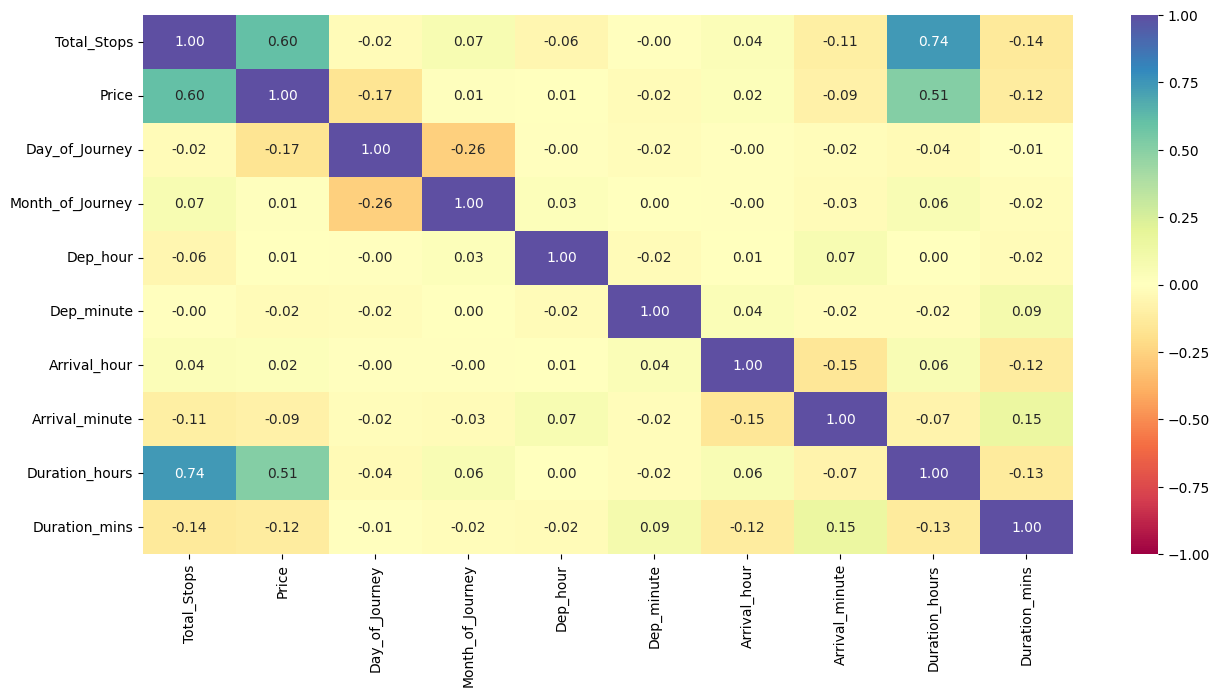

In [34]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Duration hours and Total stops are highly correlated to target column.
* Total stops and Duration hours are highly positive correlated to target column.

### `Airline` vs `Price`

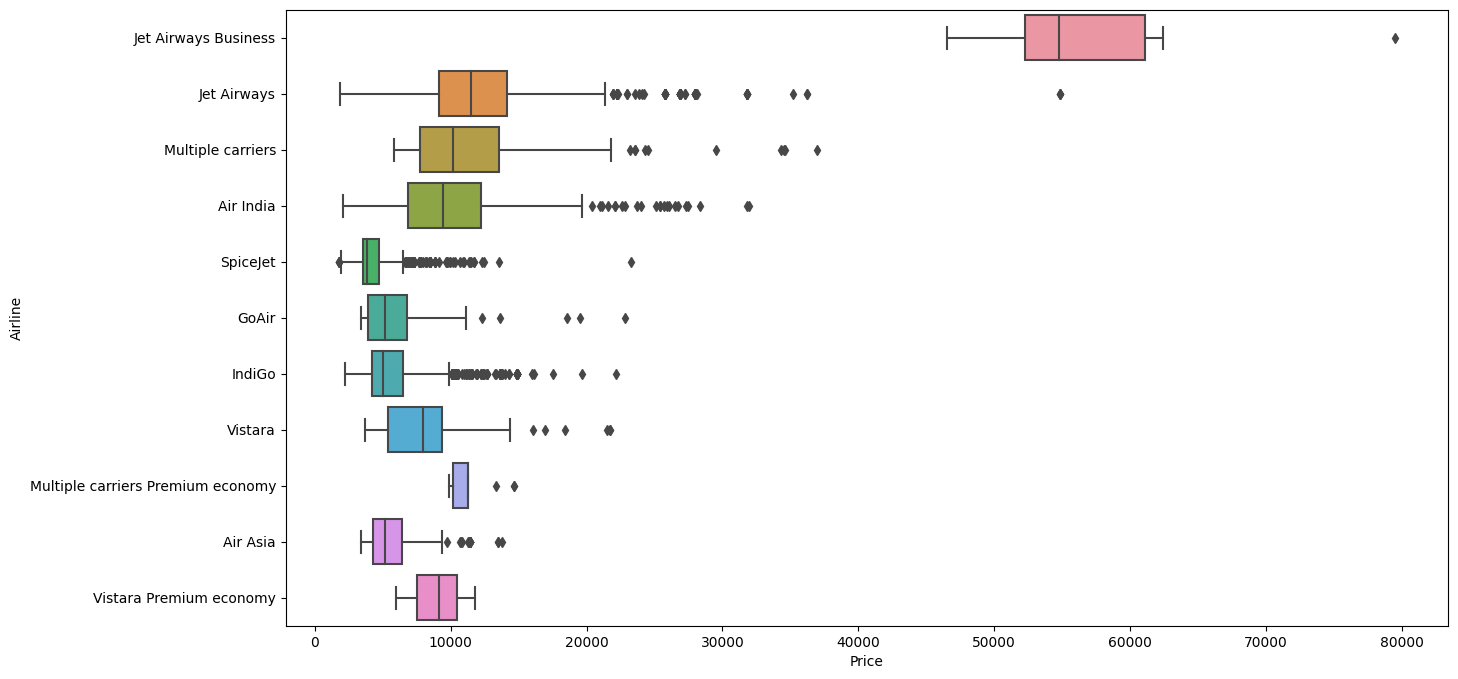

In [35]:
plt.figure(figsize=(15,8))
a=sns.boxplot(x='Price',y='Airline',data=data.sort_values('Price',ascending=False),orient="h")

- Jet Airways Business is charging high price when comparing with other Airlines
- Apart from the Jet Airways Business Airline almost all are having similar median.

In [36]:
Highest_airline_price= data[data['Airline']=='Jet Airways Business']
Highest_airline_price

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
657,Jet Airways Business,Banglore,Delhi,1,52229,3,1,5,45,10,45,5,0
2923,Jet Airways Business,Banglore,Delhi,1,79512,3,1,5,45,11,25,5,40
5371,Jet Airways Business,Banglore,Delhi,1,62427,3,1,5,45,12,25,6,40
7350,Jet Airways Business,Delhi,Cochin,2,46490,3,3,20,5,4,25,8,20
9714,Jet Airways Business,Delhi,Cochin,2,52285,3,6,20,5,4,25,8,20
10363,Jet Airways Business,Banglore,Delhi,1,57209,3,1,9,45,14,25,4,40


* We can see the price of the Jet Airways Business Airline having an average price of 50 thousand Rupees

### `Total Stops` vs `Price`

<Axes: xlabel='Total_Stops', ylabel='Price'>

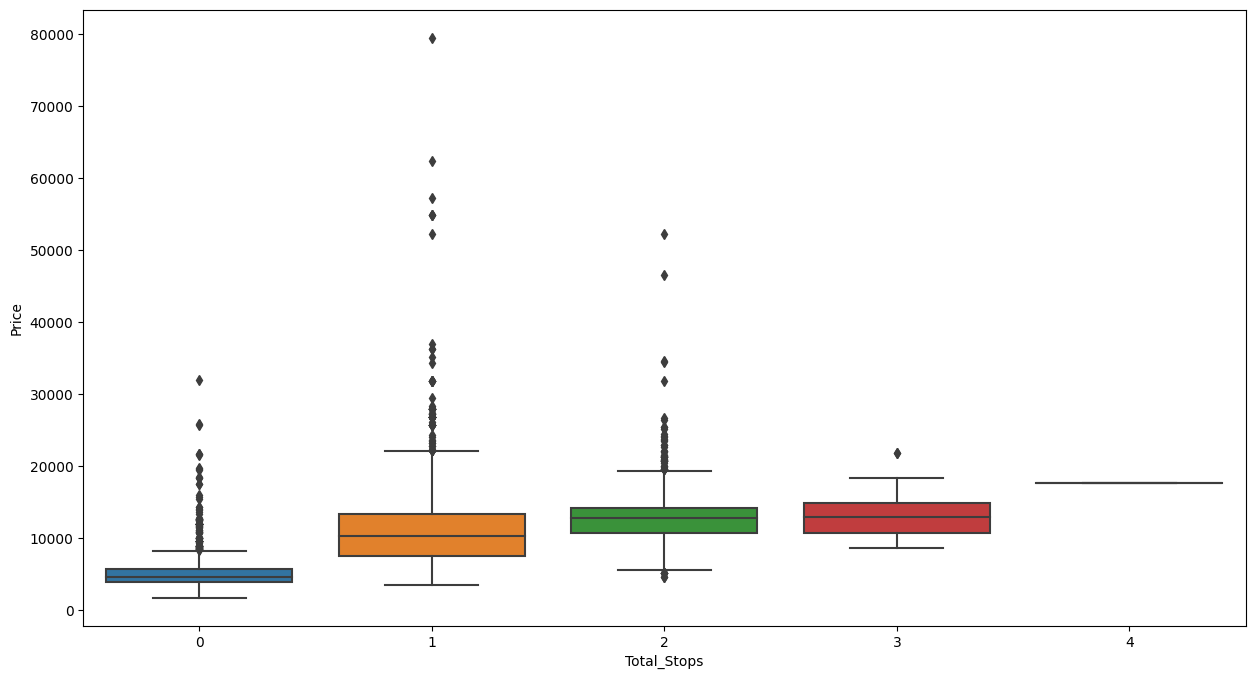

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=data.sort_values('Price',ascending=False))

* Prices of Airline having different stops are almost equal and mainly the price depends on which Airline we are choosing to travell

In [38]:
## Storing required categorical variables in cat_dat to apply dummification
cat_data = ["Airline",'Source','Destination']

In [39]:
##Splitting Independent and dependent variable in X and Y respectively
X = data.drop(['Price'],axis=1)
Y = data[['Price']]

print(X.shape)
print(Y.shape)
print(type(X))

(10681, 12)
(10681, 1)
<class 'pandas.core.frame.DataFrame'>


In [40]:
# Splitting the dataset into the Training and Testing set.
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 5,shuffle = True)

In [41]:
# Splitting the dataset into the Training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.3, random_state = 5,shuffle = True)

In [42]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
6603,Air India,Kolkata,Banglore,1,5,9,20,30,8,55,12,25
3591,Air India,Kolkata,Banglore,1,4,1,9,50,21,5,11,15
2831,IndiGo,Banglore,Delhi,0,3,9,5,30,8,20,2,50
1396,IndiGo,Delhi,Cochin,1,4,6,2,0,7,25,5,25
2045,Multiple carriers,Delhi,Cochin,1,6,1,14,55,22,30,7,35


**Normalizing**

##### **Why scaling is done?**

The numerical columns present in this dataset are having different units (Minutes and Hours), so scaling would help them all be in the same range.

**For example** -
If you have multiple independent variables like age, salary, and height, With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range.

In [43]:
## Scaling the data
sc=StandardScaler()
temp = sc.fit(X_train[["Dep_hour","Dep_minute","Arrival_hour","Arrival_minute","Duration_hours","Duration_mins"]])
X_train[["Dep_hour","Dep_minute","Arrival_hour","Arrival_minute","Duration_hours","Duration_mins"]] = temp.transform(X_train[["Dep_hour","Dep_minute","Arrival_hour","Arrival_minute","Duration_hours","Duration_mins"]])
X_test[["Dep_hour","Dep_minute","Arrival_hour","Arrival_minute","Duration_hours","Duration_mins"]] = temp.transform(X_test[["Dep_hour","Dep_minute","Arrival_hour","Arrival_minute","Duration_hours","Duration_mins"]])
X_val[["Dep_hour","Dep_minute","Arrival_hour","Arrival_minute","Duration_hours","Duration_mins"]] = temp.transform(X_val[["Dep_hour","Dep_minute","Arrival_hour","Arrival_minute","Duration_hours","Duration_mins"]])

Since we are solving the regression module, we will scale the target variable. One of the reasons to scale the data is to reduce the time complexity for updating the weights during the backpropagation, which uses the derivatives.

For classification problem, there is no need of scaling the target variable.

In [44]:
# Scaling the Target variable (contionous variable)
y_train = sc.fit_transform(y_train)
y_val_scale = sc.transform(y_val)

**Categorical Encoding**

In [45]:
# Using pd.get dummies to encode the categorical columns in the data
X_train = pd.get_dummies(X_train,columns=cat_data,drop_first= True)
X_test = pd.get_dummies(X_test,columns=cat_data,drop_first= True)
X_val = pd.get_dummies(X_val,columns=cat_data,drop_first= True)

In [46]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6728, 27)
(2884, 26)
(6728, 1)
(2884, 1)
(1069, 25)
(1069, 1)


Since we have different number of columns in train, test and validation, we will use align function to create dummy variables with all values of zero's in it.

Align method aligns two objects on their axes with the specified join method. This method is helpful when we want to synchronize a dataframe with another dataframe.

In [47]:
X_train,X_test = X_train.align(X_test,join='outer',axis=1,fill_value=0)
X_train,X_val = X_train.align(X_val,join='outer',axis=1,fill_value=0)

In [48]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6728, 27)
(2884, 27)
(6728, 1)
(2884, 1)
(1069, 27)
(1069, 1)


### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$
* We will create a function that will print out all the above metrics in one go.

# Model Building

- We will now start with the model building process.
- We will create a model.
 - Three hidden layer with ReLU as activation function.
 - Output layer with 1 nodes (For regression problem )

#### Model-1

In [49]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [50]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(27,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))

In [51]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1792      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4961 (19.38 KB)
Trainable params: 4961 (19.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Observations**
- The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
- It also shows the total number of trainable and non-trainable parameters in the model. A parameter whose value is learned while training the model is called a trainable parameter otherwise it is called a non-trainable parameter.
- In the first layer total parameters are calculated by the number of neurons in the hidden layer multiplied by the number of variables fed to neural networks plus bias. (27*64)+64 = 1792
- In the next layer the parameters are calculated by the number of outputs from the previous layer multiplied by the number of neurons in the second layer plus bias. (64*32)+32 =2080
- You can calculate for the third layer and final layer.

In [52]:
# Initializing the Optimizer
optimizer = RMSprop( learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)

Epoch 1/50
211/211 [==============================] - 2s 6ms/step - loss: 0.6844 - mae: 0.5819 - val_loss: 0.5018 - val_mae: 0.5291
Epoch 2/50
211/211 [==============================] - 1s 4ms/step - loss: 0.5188 - mae: 0.4858 - val_loss: 0.4085 - val_mae: 0.4423
Epoch 3/50
211/211 [==============================] - 1s 3ms/step - loss: 0.4699 - mae: 0.4597 - val_loss: 0.4283 - val_mae: 0.4929
Epoch 4/50
211/211 [==============================] - 1s 2ms/step - loss: 0.4389 - mae: 0.4470 - val_loss: 0.3655 - val_mae: 0.4300
Epoch 5/50
211/211 [==============================] - 1s 3ms/step - loss: 0.4121 - mae: 0.4321 - val_loss: 0.3461 - val_mae: 0.4146
Epoch 6/50
211/211 [==============================] - 1s 3ms/step - loss: 0.3847 - mae: 0.4230 - val_loss: 0.3378 - val_mae: 0.3996
Epoch 7/50
211/211 [==============================] - 1s 2ms/step - loss: 0.3660 - mae: 0.4132 - val_loss: 0.3216 - val_mae: 0.4064
Epoch 8/50
211/211 [==============================] - 1s 3ms/step - loss: 0.

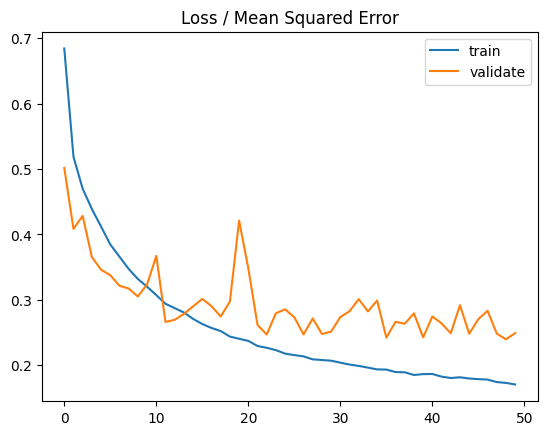

In [53]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Here the model seems to be overfitted, as the distance between the train curve and validation curve started increasing.



In [54]:
#Lets predict on validation data
Y_result_scaled= model.predict(X_val)
##As we have scaled the target variable, now after predicting we should inverse the scale and convert it to normal form
Y_result = sc.inverse_transform(Y_result_scaled)
print(Y_result)

91/91 [==============================] - 0s 1ms/step
[[ 6041.413 ]
 [13280.266 ]
 [ 7005.9673]
 ...
 [ 4552.457 ]
 [ 6950.635 ]
 [ 8768.823 ]]


In [55]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
def model_performance_regression(predictors,target,pred):
  r2 = r2_score(target, pred)  # to compute R-squared
  adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
  rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
  mae = mean_absolute_error(target, pred)  # to compute MAE

  df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

  return df_perf

In [56]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result)
model_train_perf

Validation Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,2294.09281,1621.270467,0.742704,0.740272


* Now, let's try using Early stopping and see if we can overcome the overfitting problem, we can also change the optimizer and use Adam.  

#### Model-2

**Early stopping:**

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [57]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [58]:
# Initializing the model
model_2 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(27,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_2.add(Dense(1, activation='linear'))

In [59]:
# Model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1792      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4961 (19.38 KB)
Trainable params: 4961 (19.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# Initializing the Optimizer
optimizer = Adam( learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model_2.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
211/211 [==============================] - 2s 5ms/step - loss: 0.6818 - mae: 0.5712 - val_loss: 0.4731 - val_mae: 0.5019
Epoch 2/50
211/211 [==============================] - 1s 4ms/step - loss: 0.4757 - mae: 0.4595 - val_loss: 0.4389 - val_mae: 0.4939
Epoch 3/50
211/211 [==============================] - 1s 5ms/step - loss: 0.4153 - mae: 0.4291 - val_loss: 0.4093 - val_mae: 0.4490
Epoch 4/50
211/211 [==============================] - 1s 4ms/step - loss: 0.3905 - mae: 0.4261 - val_loss: 0.3581 - val_mae: 0.4456
Epoch 5/50
211/211 [==============================] - 1s 4ms/step - loss: 0.3426 - mae: 0.4011 - val_loss: 0.3133 - val_mae: 0.4043
Epoch 6/50
211/211 [==============================] - 1s 4ms/step - loss: 0.3194 - mae: 0.3948 - val_loss: 0.2926 - val_mae: 0.3901
Epoch 7/50
211/211 [==============================] - 1s 3ms/step - loss: 0.2944 - mae: 0.3823 - val_loss: 0.2844 - val_mae: 0.3837
Epoch 8/50
211/211 [==============================] - 1s 3ms/step - loss: 0.

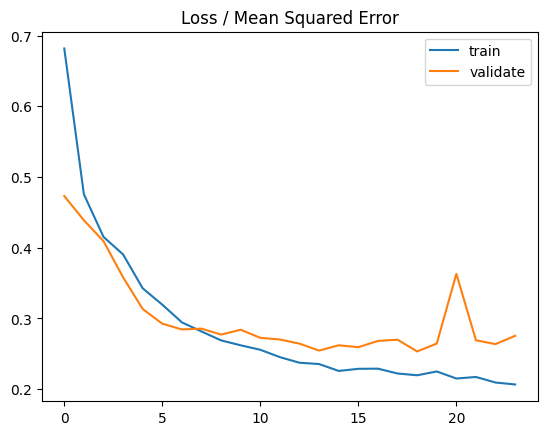

In [61]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_2.history['loss'], label='train')
pyplot.plot(history_2.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

* The train and validation curves are smooth after using Adam, although they appear to be slightly overfitted.

In [62]:
#Lets predict on validation data
Y_result_scaled_2= model_2.predict(X_val)
##As we have scaled the target variable, now after predicting we should inverse the scale and should convert to normal form
Y_result2 = sc.inverse_transform(Y_result_scaled_2)
print(Y_result2)

91/91 [==============================] - 0s 1ms/step
[[ 7291.0312]
 [14379.794 ]
 [ 7245.5996]
 ...
 [ 4836.409 ]
 [ 6660.4937]
 [10716.401 ]]


In [63]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result2)
model_train_perf

Validation Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,2411.607222,1758.546735,0.715669,0.712981


Changing the optimizer didn't work, and even the Adj R-square has decreased when compared to previous model.

* Let's use two Regularization techniques to reduce the overfitting problem.

 - Dropout
 - BatchNormalization

#### Model-3

**Dropout**

Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.

In [64]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [65]:
# Initializing the model
model_3 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_3.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(27,)))
# Adding Dropout with 20%
model_3.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding Dropout with 10%
model_3.add(Dropout(0.2))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_3.add(Dense(1, activation='linear'))

In [66]:
# Model summary
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1792      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17

In [67]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_3.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_3 = model_3.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
211/211 [==============================] - 2s 4ms/step - loss: 1.8456 - mae: 0.9880 - val_loss: 0.9055 - val_mae: 0.7607
Epoch 2/50
211/211 [==============================] - 1s 3ms/step - loss: 0.9994 - mae: 0.7651 - val_loss: 0.8579 - val_mae: 0.7338
Epoch 3/50
211/211 [==============================] - 1s 3ms/step - loss: 0.8575 - mae: 0.6951 - val_loss: 0.6530 - val_mae: 0.6123
Epoch 4/50
211/211 [==============================] - 1s 3ms/step - loss: 0.7092 - mae: 0.6135 - val_loss: 0.5500 - val_mae: 0.5614
Epoch 5/50
211/211 [==============================] - 1s 3ms/step - loss: 0.6123 - mae: 0.5552 - val_loss: 0.4701 - val_mae: 0.4964
Epoch 6/50
211/211 [==============================] - 1s 3ms/step - loss: 0.5445 - mae: 0.5143 - val_loss: 0.4175 - val_mae: 0.4637
Epoch 7/50
211/211 [==============================] - 1s 3ms/step - loss: 0.5088 - mae: 0.4968 - val_loss: 0.3985 - val_mae: 0.4457
Epoch 8/50
211/211 [==============================] - 1s 3ms/step - loss: 0.

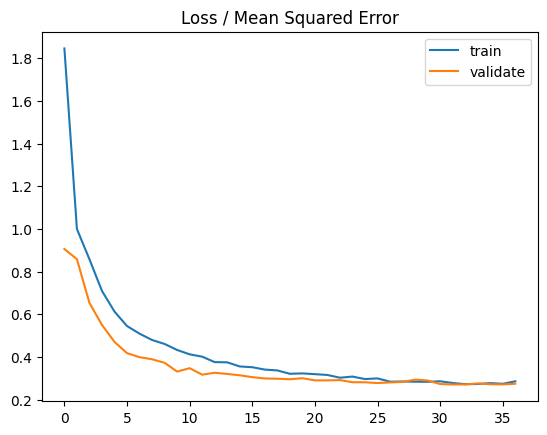

In [68]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_3.history['loss'], label='train')
pyplot.plot(history_3.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

After using Dropout technique the train and validation curves seems to be smooth.

In [69]:
Y_result_scaled_3= model_3.predict(X_val)
Y_result_3 = sc.inverse_transform(Y_result_scaled_3)
print(Y_result_3)

91/91 [==============================] - 0s 1ms/step
[[ 6186.827 ]
 [11705.093 ]
 [ 7145.7344]
 ...
 [ 5130.2593]
 [ 7687.8296]
 [ 9695.909 ]]


In [70]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result_3)
model_train_perf

Validation Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,2406.066555,1783.383691,0.716974,0.714298


The Adjusted R-Square has increased when compared to the previous model. Now let's try the BatchNormalization technique and see if we can improve the metrics.

#### Model-4

In [71]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [72]:
# Initializing the model
model_4 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_4.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(27,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding Batch Normalization
model_4.add(BatchNormalization())
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_4.add(Dense(1, activation='linear'))

In [73]:
# Model summary
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1792      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5089 (19.88 KB)
Trainable params: 5025 (19.63 KB)
Non-trainable params: 64 (256.00 Byte)
___________________

In [74]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_4.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_4 = model_4.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
211/211 [==============================] - 2s 4ms/step - loss: 0.6783 - mae: 0.5725 - val_loss: 0.4276 - val_mae: 0.4677
Epoch 2/50
211/211 [==============================] - 1s 3ms/step - loss: 0.4666 - mae: 0.4621 - val_loss: 0.3703 - val_mae: 0.4300
Epoch 3/50
211/211 [==============================] - 1s 3ms/step - loss: 0.4179 - mae: 0.4392 - val_loss: 0.3614 - val_mae: 0.4308
Epoch 4/50
211/211 [==============================] - 1s 3ms/step - loss: 0.3965 - mae: 0.4324 - val_loss: 0.3709 - val_mae: 0.4293
Epoch 5/50
211/211 [==============================] - 1s 3ms/step - loss: 0.3757 - mae: 0.4239 - val_loss: 0.3566 - val_mae: 0.4200
Epoch 6/50
211/211 [==============================] - 1s 3ms/step - loss: 0.3549 - mae: 0.4159 - val_loss: 0.5472 - val_mae: 0.4751
Epoch 7/50
211/211 [==============================] - 1s 3ms/step - loss: 0.3330 - mae: 0.4023 - val_loss: 0.4560 - val_mae: 0.4341
Epoch 8/50
211/211 [==============================] - 1s 3ms/step - loss: 0.

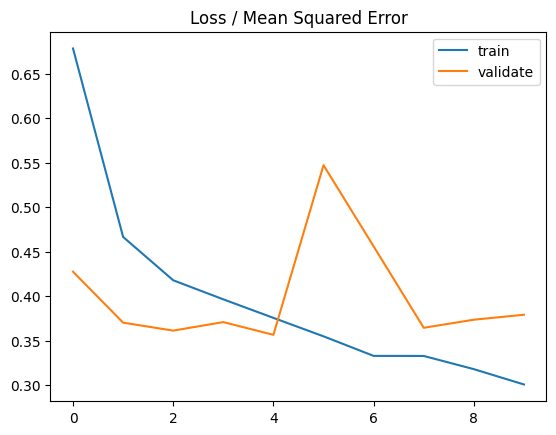

In [75]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_4.history['loss'], label='train')
pyplot.plot(history_4.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

The train and validation curves are smooth. Now let's calculate the metrics.

In [76]:
Y_result_scaled_4= model_4.predict(X_val)
Y_result_4 = sc.inverse_transform(Y_result_scaled_4)
print(Y_result_4)

91/91 [==============================] - 0s 1ms/step
[[ 4419.104 ]
 [12774.151 ]
 [ 5789.995 ]
 ...
 [ 3802.5327]
 [ 6229.389 ]
 [ 9381.984 ]]


In [77]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result_4)
model_train_perf

Validation Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,2829.838269,1924.082406,0.608498,0.604797


* BatchNormalization technique did not perform well on and even the Adjusted R-square dropped sharply.
* Let's try to build another model using Dropout with different neural network architecture and see if we can improve the Adjusted R-square.

### Model-5

In [78]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [79]:
# Initializing the model
model_5 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_5.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(27,)))
# Adding dropout with ratio of 0.1
model_5.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding dropout with ratio of 0.1
model_5.add(Dropout(0.1))
# Adding the second hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the third hidden layer with 8 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_5.add(Dense(1, activation='linear'))

In [80]:
# Model summary
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1792      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [81]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_5.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
# Adding the callbacks
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_5 = model_5.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
211/211 [==============================] - 2s 4ms/step - loss: 1.6395 - mae: 0.9367 - val_loss: 0.7936 - val_mae: 0.7092
Epoch 2/50
211/211 [==============================] - 1s 3ms/step - loss: 0.8394 - mae: 0.6794 - val_loss: 0.6044 - val_mae: 0.5880
Epoch 3/50
211/211 [==============================] - 1s 3ms/step - loss: 0.7176 - mae: 0.6148 - val_loss: 0.5124 - val_mae: 0.5122
Epoch 4/50
211/211 [==============================] - 1s 3ms/step - loss: 0.6340 - mae: 0.5657 - val_loss: 0.4888 - val_mae: 0.5176
Epoch 5/50
211/211 [==============================] - 1s 3ms/step - loss: 0.5808 - mae: 0.5336 - val_loss: 0.4422 - val_mae: 0.4717
Epoch 6/50
211/211 [==============================] - 1s 3ms/step - loss: 0.5413 - mae: 0.5132 - val_loss: 0.4151 - val_mae: 0.4553
Epoch 7/50
211/211 [==============================] - 1s 3ms/step - loss: 0.5213 - mae: 0.5005 - val_loss: 0.4049 - val_mae: 0.4485
Epoch 8/50
211/211 [==============================] - 1s 3ms/step - loss: 0.

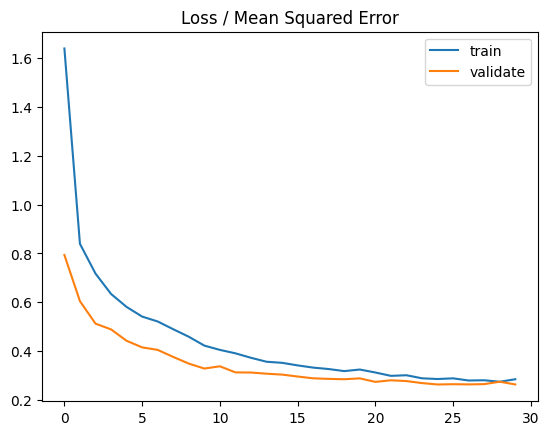

In [82]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_5.history['loss'], label='train')
pyplot.plot(history_5.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

* We can observe that after increasing the layers, both the curves seems to be smooth.

In [83]:
Y_result_scaled_5= model_5.predict(X_val)
Y_result_5 = sc.inverse_transform(Y_result_scaled_5)
print(Y_result_5)

91/91 [==============================] - 0s 1ms/step
[[ 6211.8735]
 [12267.523 ]
 [ 7010.832 ]
 ...
 [ 4937.3223]
 [ 7737.0654]
 [10878.756 ]]


In [84]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result_5)
model_train_perf

Validation Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,2358.132098,1751.359247,0.728139,0.725569


The Adjusted R-square of the model increased, and increasing the number of layers did work to improve the metrics.

Out of all the models built, the final Model-5 with the dropout technique gives a good Adjusted R-Square when compared to all the models. Now let's predict on the test data using Model-5.

####**Test Prediction**

In [85]:
# Predicting on test dat
test_pred = model_5.predict(X_test)
##As we have scaled the target variable, now after predicting we should inverse the scale and should convert to normal form
test_pred = sc.inverse_transform(test_pred)
print(test_pred)

34/34 [==============================] - 0s 1ms/step
[[11512.05  ]
 [ 6153.3687]
 [ 9048.327 ]
 ...
 [11756.782 ]
 [ 8353.491 ]
 [11104.263 ]]


In [86]:
# Checking model performance on train set
print("Training Performance\n")
model_train_perf = model_performance_regression(X_test,y_test, test_pred)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,2904.175029,1864.686857,0.653189,0.644194


### Comments

- We have trained 5 different models with some changes in architecture and Optimizer.
- Just by increasing one layer in the last model, we were able to reduce the loss.
- Play around with your neural network model by changing the number of dense layers, learning rate, number of neurons in hidden layers. Try out different loss and activation functions and see if you can get a better Adjusted R Square.

### Happy Learning !